# Table of Contents
#### Import libraries
#### Import orders_products_customers_merged dataset
#### Exclude customers with less than 5 orders from dataset
#### Create age range profile variable
#### Create income range profile variable
#### Create parental status profile variable
#### Create multiple crosstabs to explore relationships and gain insights with corresponding visualizations
###### Crosstabs in following order: (age, parental status, spending), (age, parental status, order frequency), (departments, age), (departments, parental status), (income, order frequency), (income, spending), (order frequency, spending), (gender, order frequency), (age, order frequency), (parental status, order frequency), (family status, order frequency), (region, order frequency), (region, departments), (region, loyalty), (region), (loyalty, price range), (loyalty), (days since prior order), (department)


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'C:\Users\cschm\Desktop\CareerFoundry\Achievement 4\Instacart Basket Analysis'

In [3]:
#Import dataset
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

#### Locate low-activity customers (customers with less than 5 orders) and exclude them from the data

In [4]:
#Define low activity customers
low_activity_customers = ords_prods_cust.loc[ords_prods_cust['max_order'] < 5]

In [5]:
#Define new df that excludes low activity customers
ords_prods_cust_active = ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5]

In [6]:
#Check shapes of new datasets to ensure accuracy
ords_prods_cust.shape

(32404859, 32)

In [7]:
low_activity_customers.shape

(1440295, 32)

In [8]:
ords_prods_cust_active.shape

(30964564, 32)

In [9]:
#Sum of low_activity_customers and ords_prods_cust_active should equal original df (32404859)
1440295 + 30964564

32404859

In [10]:
#Export the low activity customers sample 
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

#### Create a profiling variables based on age, income, certain goods in the “department_id” column, and number of dependents.

In [11]:
#Display all columns in head.()
pd.set_option('display.max_columns', None)

In [12]:
ords_prods_cust_active.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spender_flag,order_frequency,order_freq_flag,avg_spend,Region,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce


In [13]:
#Create Age categories
result = []

for value in ords_prods_cust_active['Age']:
  if value in range (18,36):
    result.append('Young')
  elif value in range (36,65):
    result.append('Middle-age')
  else:
    result.append('Older')

In [14]:
ords_prods_cust_active['age_range'] = result

C:\Users\cschm\AppData\Local\Temp\ipykernel_19028\15019871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active['age_range'] = result


In [15]:
ords_prods_cust_active['age_range'].value_counts(dropna = False)

age_range
Middle-age    14030215
Young          8738805
Older          8195544
Name: count, dtype: int64

In [16]:
ords_prods_cust_active['age_range'].info()

<class 'pandas.core.series.Series'>
Index: 30964564 entries, 0 to 32404817
Series name: age_range
Non-Null Count     Dtype 
--------------     ----- 
30964564 non-null  object
dtypes: object(1)
memory usage: 472.5+ MB


In [17]:
#Explore income values
ords_prods_cust_active['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [18]:
#Create income categories
result = []

for value in ords_prods_cust_active['income']:
  if value < (50000):
    result.append('Low')
  elif value in range (50000,100000):
    result.append('Low average')
  elif value in range (100000,150000):
    result.append('High average')
  else:
    result.append('High')

In [19]:
ords_prods_cust_active['income_range'] = result

C:\Users\cschm\AppData\Local\Temp\ipykernel_19028\1586515207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active['income_range'] = result


In [20]:
ords_prods_cust_active['income_range'].value_counts(dropna = False)

income_range
Low average     13394608
High average    10312127
High             3895275
Low              3362554
Name: count, dtype: int64

In [21]:
#Create Parent category
result = []

for value in ords_prods_cust_active['number_dependants']:
  if value == (0):
    result.append('Not parent')
  else:
    result.append('Parent')

In [22]:
ords_prods_cust_active['parental_status'] = result

C:\Users\cschm\AppData\Local\Temp\ipykernel_19028\715216354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_active['parental_status'] = result


In [23]:
ords_prods_cust_active['parental_status'].value_counts(dropna = False)

parental_status
Parent        23224883
Not parent     7739681
Name: count, dtype: int64

In [24]:
ords_prods_cust_active.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spender_flag,order_frequency,order_freq_flag,avg_spend,Region,department,age_range,income_range,parental_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent


#### Multiple crosstabs comparing variables in order to explore relationships, develop insights, and create visualizations

In [25]:
crosstab = pd.crosstab(ords_prods_cust_active['age_range'], ords_prods_cust_active['parental_status'], dropna = False)

In [26]:
print(crosstab)

parental_status  Not parent    Parent
age_range                            
Middle-age          3540033  10490182
Older               2021958   6173586
Young               2177690   6561115


In [34]:
#Add spender_flag variable to age range and parent status crosstab
crosstab1 = pd.crosstab(ords_prods_cust_active['spender_flag'], [ords_prods_cust_active['parental_status'], ords_prods_cust_active['age_range']], dropna = False)

In [35]:
print(crosstab1)

parental_status Not parent                       Parent                  
age_range       Middle-age    Older    Young Middle-age    Older    Young
spender_flag                                                             
High spender         67674    41668    36700     216805   115218   125360
Low spender        3472359  1980290  2140990   10273377  6058368  6435755


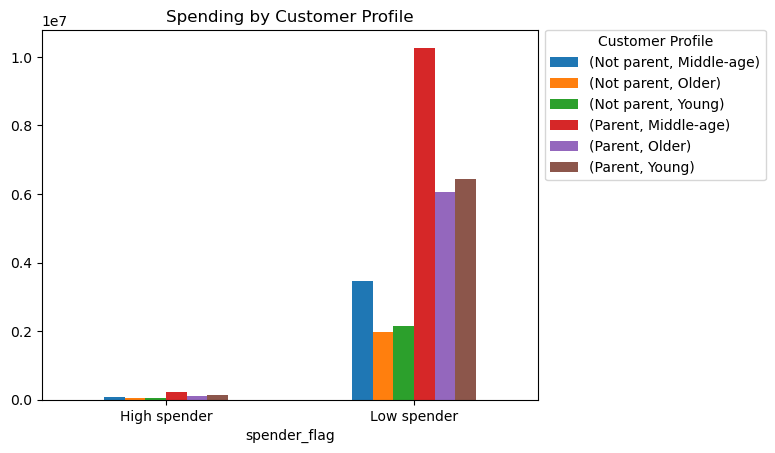

In [41]:
#Create bar chart of crosstab1
a = crosstab1.plot(kind = 'bar', rot = 0, title = 'Spending by Customer Profile')
a.legend(title = 'Customer Profile', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [42]:
#Export bar chart to png
a.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile_spending.png'))

In [43]:
#Compare order frequency with customer profile
crosstab2 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['parental_status'], ords_prods_cust_active['age_range']], dropna = True)

In [44]:
print(crosstab2)

parental_status       Not parent                       Parent           \
age_range             Middle-age    Older    Young Middle-age    Older   
order_freq_flag                                                          
Frequent customer        2425030  1390723  1469384    7174722  4240253   
Non-frequent customer     325199   186087   205220     995775   574045   
Regular customer          789804   445148   503086    2319685  1359288   

parental_status                 
age_range                Young  
order_freq_flag                 
Frequent customer      4504364  
Non-frequent customer   608649  
Regular customer       1448102  


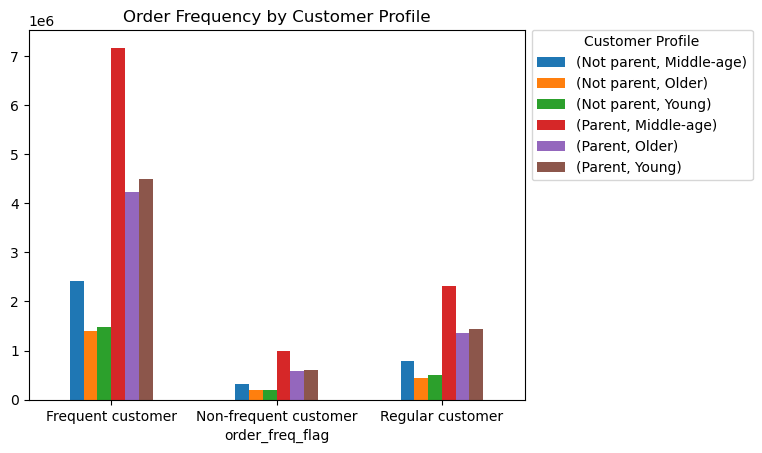

In [45]:
#Create bar chart of crosstab2
b = crosstab2.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Customer Profile')
b.legend(title = 'Customer Profile', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [46]:
#Export bar chart to png
b.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile_order_freq.png'))

In [48]:
#Compare types of products with parental status
crosstab3 = pd.crosstab(ords_prods_cust_active['department'], [ords_prods_cust_active['parental_status']], dropna = True, margins = True)

In [49]:
print(crosstab3)

parental_status  Not parent    Parent       All
department                                     
alcohol               36827    107800    144627
babies               103328    307064    410392
bakery               281395    839433   1120828
beverages            645341   1926560   2571901
breakfast            166432    504418    670850
bulk                   8000     25451     33451
canned goods         251020    761054   1012074
dairy eggs          1294376   3882806   5177182
deli                 253382    750452   1003834
dry goods pasta      204296    617840    822136
frozen               529348   1592383   2121731
household            171358    528499    699857
international         64461    191530    255991
meat seafood         165878    508903    674781
missing               15935     48833     64768
other                  8714     25697     34411
pantry               443904   1338801   1782705
personal care        106205    318101    424306
pets                  23602     69458   

In [50]:
#Sort by sum of values
sorted_crosstab3 = crosstab3.sort_values(by = 'All', ascending = True)

In [51]:
#Drop sum row and column
new_sorted_crosstab3 = sorted_crosstab3.drop('All', axis = 0).drop('All', axis = 1)

In [52]:
print(new_sorted_crosstab3)

parental_status  Not parent   Parent
department                          
bulk                   8000    25451
other                  8714    25697
missing               15935    48833
pets                  23602    69458
alcohol               36827   107800
international         64461   191530
babies               103328   307064
personal care        106205   318101
breakfast            166432   504418
meat seafood         165878   508903
household            171358   528499
dry goods pasta      204296   617840
deli                 253382   750452
canned goods         251020   761054
bakery               281395   839433
pantry               443904  1338801
frozen               529348  1592383
beverages            645341  1926560
snacks               690438  2075968
dairy eggs          1294376  3882806
produce             2275441  6803832


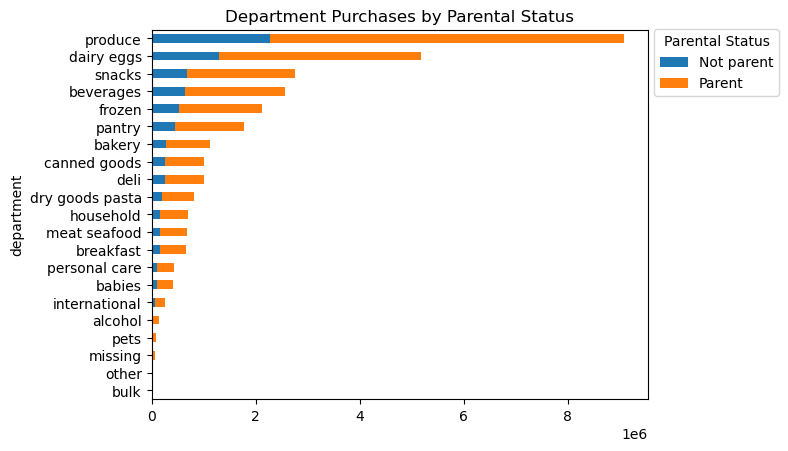

In [54]:
#Create bar chart of crosstab3
c = new_sorted_crosstab3.plot(kind = 'barh', stacked = True, rot = 0, title = 'Department Purchases by Parental Status')
c.legend(title = 'Parental Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [55]:
#Export bar chart to png
c.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_parental_status.png'))

In [56]:
#Compare types of products with age range
crosstab4 = pd.crosstab(ords_prods_cust_active['department'], [ords_prods_cust_active['age_range']], dropna = True, margins = True)

In [57]:
print(crosstab4)

age_range        Middle-age    Older    Young       All
department                                             
alcohol               65549    36693    42385    144627
babies               190723   106204   113465    410392
bakery               507800   295997   317031   1120828
beverages           1170491   684020   717390   2571901
breakfast            304137   175296   191417    670850
bulk                  14882     8945     9624     33451
canned goods         457386   267509   287179   1012074
dairy eggs          2337584  1368072  1471526   5177182
deli                 454772   265199   283863   1003834
dry goods pasta      372239   217316   232581    822136
frozen               960444   564250   597037   2121731
household            317274   186630   195953    699857
international        115879    67199    72913    255991
meat seafood         304239   181150   189392    674781
missing               29107    16915    18746     64768
other                 15519     8946     9946   

In [58]:
#Sort by sum of values
sorted_crosstab4 = crosstab4.sort_values(by = 'All', ascending = True)

In [59]:
#Drop sum row and column
new_sorted_crosstab4 = sorted_crosstab4.drop('All', axis = 0).drop('All', axis = 1)

In [60]:
print(new_sorted_crosstab4)

age_range        Middle-age    Older    Young
department                                   
bulk                  14882     8945     9624
other                 15519     8946     9946
missing               29107    16915    18746
pets                  41517    25115    26428
alcohol               65549    36693    42385
international        115879    67199    72913
babies               190723   106204   113465
personal care        194554   111052   118700
breakfast            304137   175296   191417
meat seafood         304239   181150   189392
household            317274   186630   195953
dry goods pasta      372239   217316   232581
deli                 454772   265199   283863
canned goods         457386   267509   287179
bakery               507800   295997   317031
pantry               807475   472383   502847
frozen               960444   564250   597037
beverages           1170491   684020   717390
snacks              1252869   728549   784988
dairy eggs          2337584  13680

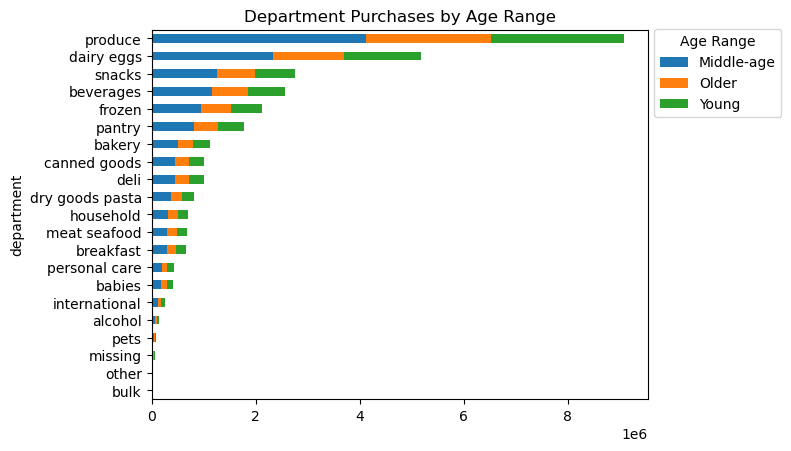

In [61]:
#Create bar chart of crosstab4
d = new_sorted_crosstab4.plot(kind = 'barh', stacked = True, rot = 0, title = 'Department Purchases by Age Range')
d.legend(title = 'Age Range', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [62]:
#Export bar chart to png
d.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_age_range.png'))

In [63]:
#Compare types of order frequency with income range
crosstab5 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['income_range']], dropna = True, margins = True)

In [64]:
print(crosstab5)

income_range              High  High average      Low  Low average       All
order_freq_flag                                                             
Frequent customer      2700205       7079492  2199082      9225697  21204476
Non-frequent customer   345292        945210   376138      1228335   2894975
Regular customer        849778       2287425   787334      2940576   6865113
All                    3895275      10312127  3362554     13394608  30964564


In [73]:
#Sort by sum of values
sorted_crosstab5 = crosstab5.sort_values(by = 'All', ascending = True)

In [74]:
print(sorted_crosstab5)

income_range              High  High average      Low  Low average       All
order_freq_flag                                                             
Non-frequent customer   345292        945210   376138      1228335   2894975
Regular customer        849778       2287425   787334      2940576   6865113
Frequent customer      2700205       7079492  2199082      9225697  21204476
All                    3895275      10312127  3362554     13394608  30964564


In [67]:
#Drop sum row and column
new_sorted_crosstab5 = sorted_crosstab5.drop('All', axis = 0).drop('All', axis = 1)

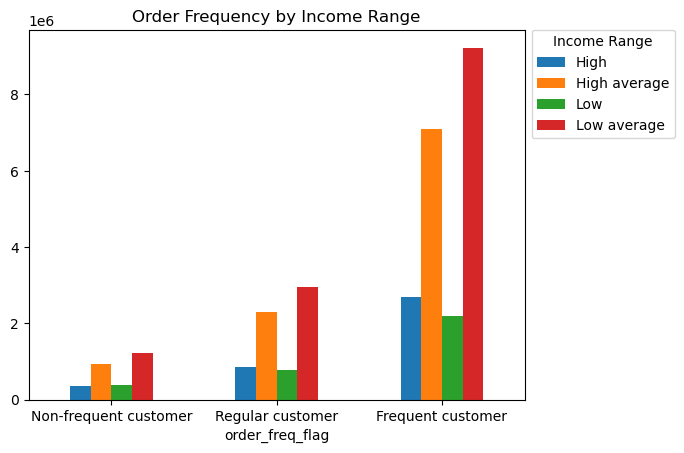

In [75]:
#Create bar chart of crosstab5
e = new_sorted_crosstab5.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Income Range')
e.legend(title = 'Income Range', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [76]:
#Export bar chart to png
e.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_freq_income.png'))

In [77]:
#Compare types of spender_flag with income range
crosstab6 = pd.crosstab(ords_prods_cust_active['spender_flag'], [ords_prods_cust_active['income_range']], dropna = True)

In [78]:
print(crosstab6)

income_range     High  High average      Low  Low average
spender_flag                                             
High spender   388904        134951     2026        77544
Low spender   3506371      10177176  3360528     13317064


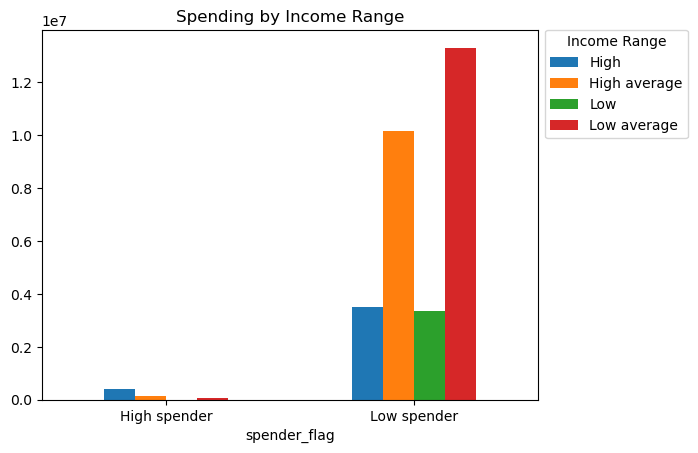

In [79]:
#Create bar chart of crosstab6
f = crosstab6.plot(kind = 'bar', rot = 0, title = 'Spending by Income Range')
f.legend(title = 'Income Range', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [80]:
#Export bar chart to png
f.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_flag_income.png'))

In [81]:
#Compare types of spender_flag with order frequency flag
crosstab7 = pd.crosstab(ords_prods_cust_active['spender_flag'], [ords_prods_cust_active['order_freq_flag']], dropna = True)

In [82]:
print(crosstab7)

order_freq_flag  Frequent customer  Non-frequent customer  Regular customer
spender_flag                                                               
High spender                418245                  51484            133696
Low spender               20786231                2843491           6731417


In [86]:
sorted_crosstab7 = crosstab7.sort_values(by = 'spender_flag', ascending = True)

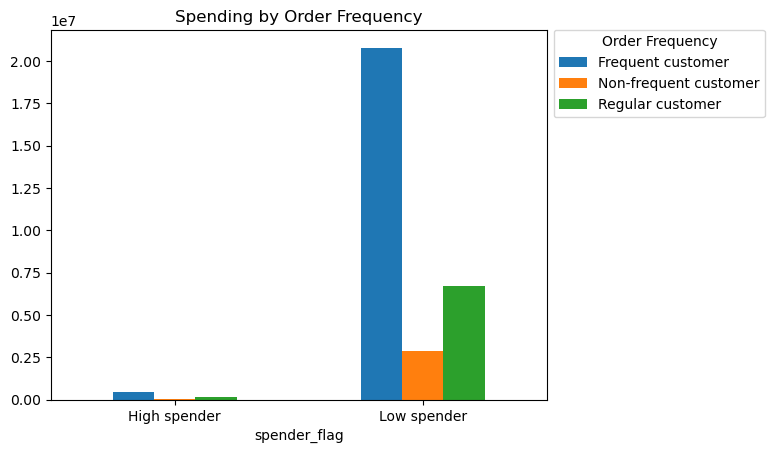

In [96]:
#Create bar chart of crosstab7
g = sorted_crosstab7.plot(kind = 'bar', rot = 0, title = 'Spending by Order Frequency')
g.legend(title = 'Order Frequency', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [89]:
#Export bar chart to png
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_flag_order_freq.png'))

In [97]:
#Compare types of gender with order frequency flag
crosstab8 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['Gender']], dropna = True)

In [98]:
print(crosstab8)

Gender                   Female      Male
order_freq_flag                          
Frequent customer      10540011  10664465
Non-frequent customer   1430973   1464002
Regular customer        3406840   3458273


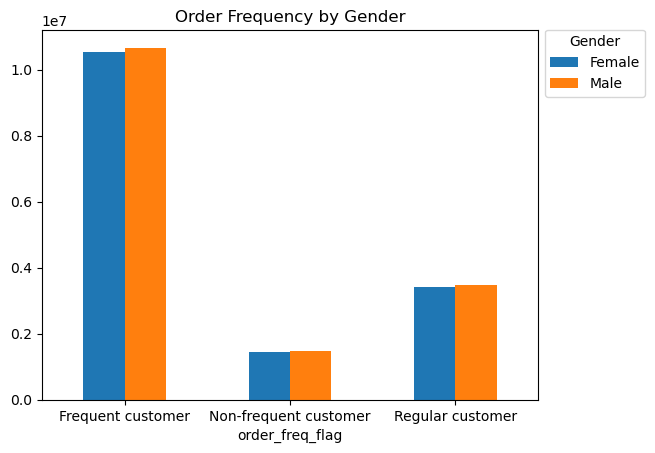

In [99]:
#Create bar chart of crosstab8
h = crosstab8.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Gender')
h.legend(title = 'Gender', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [100]:
#Export bar chart to png
h.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender_order_freq.png'))

In [101]:
#Compare types of age ranges with order frequency flag
crosstab9 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['age_range']], dropna = True)

In [102]:
print(crosstab9)

age_range              Middle-age    Older    Young
order_freq_flag                                    
Frequent customer         9599752  5630976  5973748
Non-frequent customer     1320974   760132   813869
Regular customer          3109489  1804436  1951188


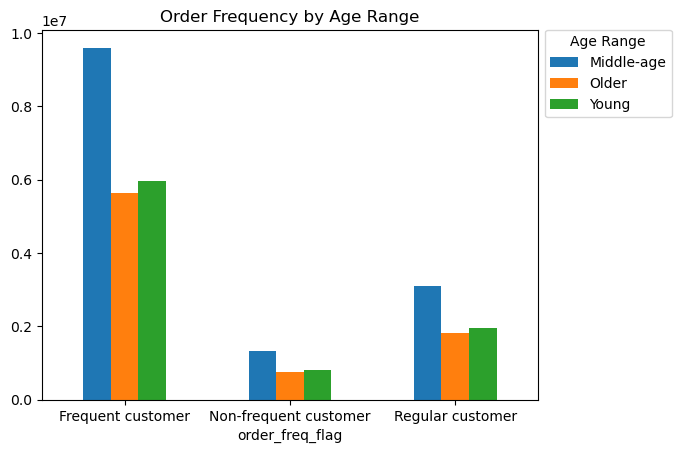

In [103]:
#Create bar chart of crosstab9
i = crosstab9.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Age Range')
i.legend(title = 'Age Range', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [104]:
#Export bar chart to png
i.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_range_order_freq.png'))

In [105]:
#Compare types of parental status with order frequency flag
crosstab10 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['parental_status']], dropna = True)

In [106]:
print(crosstab10)

parental_status        Not parent    Parent
order_freq_flag                            
Frequent customer         5285137  15919339
Non-frequent customer      716506   2178469
Regular customer          1738038   5127075


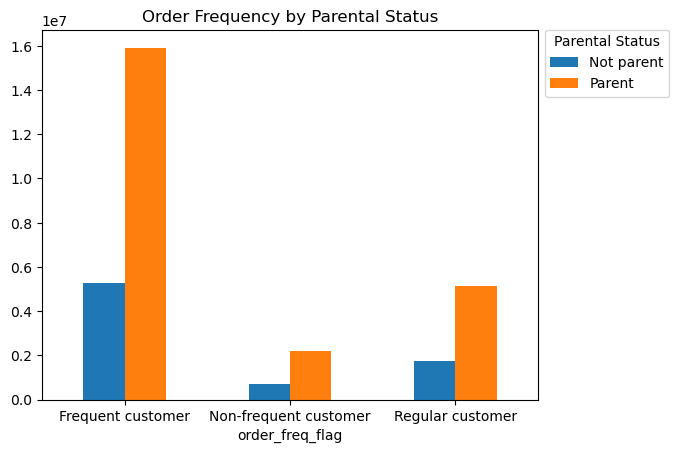

In [107]:
#Create bar chart of crosstab10
j = crosstab10.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Parental Status')
j.legend(title = 'Parental Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [108]:
#Export bar chart to png
j.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_order_freq.png'))

In [109]:
#Compare types of family status with order frequency flag
crosstab11 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['fam_status']], dropna = True)

In [110]:
print(crosstab11)

fam_status             divorced/widowed  living with parents and siblings  \
order_freq_flag                                                             
Frequent customer               1819123                           1030514   
Non-frequent customer            243934                            138646   
Regular customer                 582214                            312012   

fam_status              married   single  
order_freq_flag                           
Frequent customer      14888825  3466014  
Non-frequent customer   2039823   472572  
Regular customer        4815063  1155824  


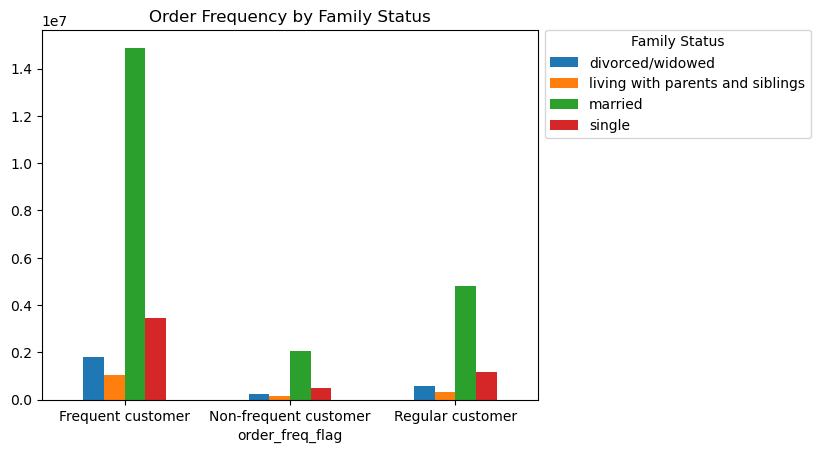

In [111]:
#Create bar chart of crosstab11
k = crosstab11.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Family Status')
k.legend(title = 'Family Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [112]:
#Export bar chart to png
k.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_order_freq.png'))

In [113]:
#Compare order frequency with region
crosstab12 = pd.crosstab(ords_prods_cust_active['order_freq_flag'], [ords_prods_cust_active['Region']], dropna = True)

In [114]:
print(crosstab12)

Region                 Midwest  Northeast    South     West
order_freq_flag                                            
Frequent customer      4935393    3740982  7073789  5454312
Non-frequent customer   690030     496911   968006   740028
Regular customer       1636090    1226792  2269344  1732887


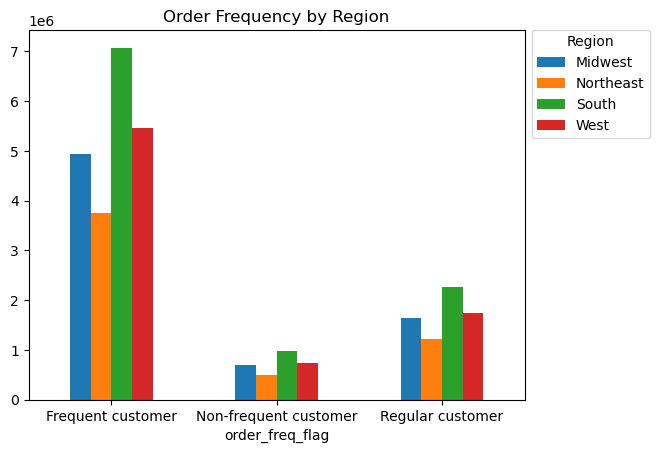

In [115]:
#Create bar chart of crosstab12
l = crosstab12.plot(kind = 'bar', rot = 0, title = 'Order Frequency by Region')
l.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [116]:
#Export bar chart to png
l.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_order_freq.png'))

In [117]:
#Compare departments with region
crosstab13 = pd.crosstab(ords_prods_cust_active['department'], [ords_prods_cust_active['Region']], dropna = True, margins = True)

In [118]:
print(crosstab13)

Region           Midwest  Northeast     South     West       All
department                                                      
alcohol            34043      25017     48813    36754    144627
babies             95741      72712    139511   102428    410392
bakery            261753     199300    371620   288155   1120828
beverages         598979     462929    859419   650574   2571901
breakfast         156155     117904    223172   173619    670850
bulk                7929       5599     11180     8743     33451
canned goods      237459     176936    337458   260221   1012074
dairy eggs       1212490     914616   1723016  1327060   5177182
deli              234464     178398    333620   257352   1003834
dry goods pasta   193463     143817    272813   212043    822136
frozen            498225     370436    709906   543164   2121731
household         166992     124604    230061   178200    699857
international      60666      44678     84649    65998    255991
meat seafood      158260 

In [119]:
#Sort by sum of values
sorted_crosstab13 = crosstab13.sort_values(by = 'All', ascending = True)

In [120]:
#Drop sum row and column
new_sorted_crosstab13 = sorted_crosstab13.drop('All', axis = 0).drop('All', axis = 1)

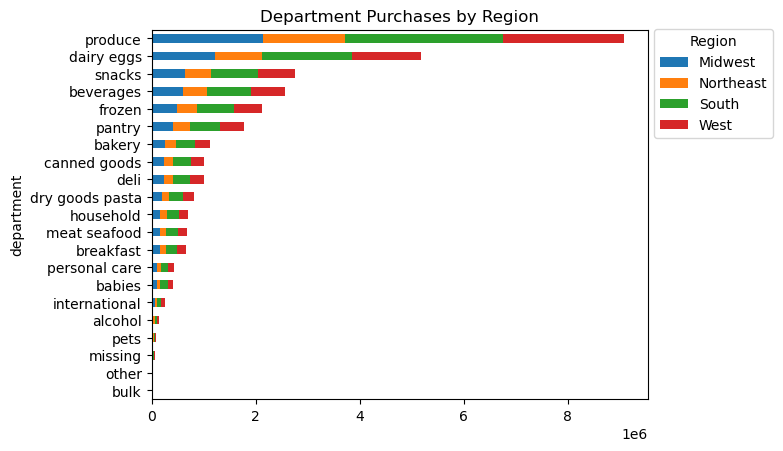

In [121]:
#Create bar chart of crosstab13
m = new_sorted_crosstab13.plot(kind = 'barh', stacked = True, rot = 0, title = 'Department Purchases by Region')
m.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [122]:
#Export bar chart to png
m.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

In [123]:
#Compare loyalty_flag with region
crosstab14 = pd.crosstab(ords_prods_cust_active['loyalty_flag'], [ords_prods_cust_active['Region']], dropna = True)

In [124]:
print(crosstab14)

Region            Midwest  Northeast    South     West
loyalty_flag                                          
Loyal customer    2373774    1841785  3405844  2662690
New customer      1136761     842156  1593664  1231114
Regular customer  3750978    2780744  5311631  4033423


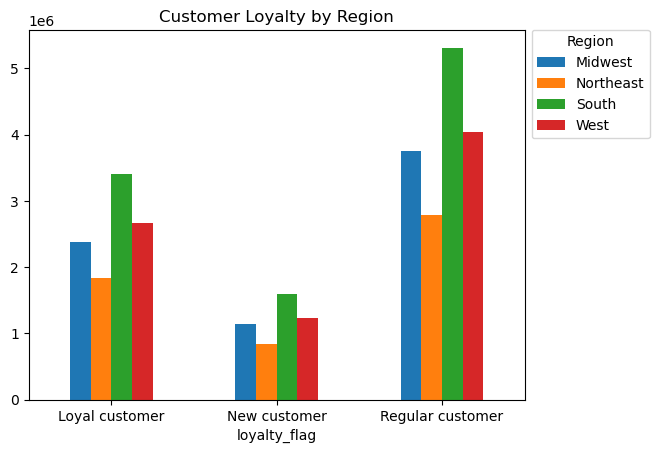

In [125]:
#Create bar chart of crosstab14
n = crosstab14.plot(kind = 'bar', rot = 0, title = 'Customer Loyalty by Region')
n.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [126]:
#Export bar chart to png
n.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_loyalty_flag.png'))

In [127]:
#Look at orders by region
ords_prods_cust_active['Region'].value_counts()

Region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

Text(0.5, 1.0, 'Instacart Orders by Region')

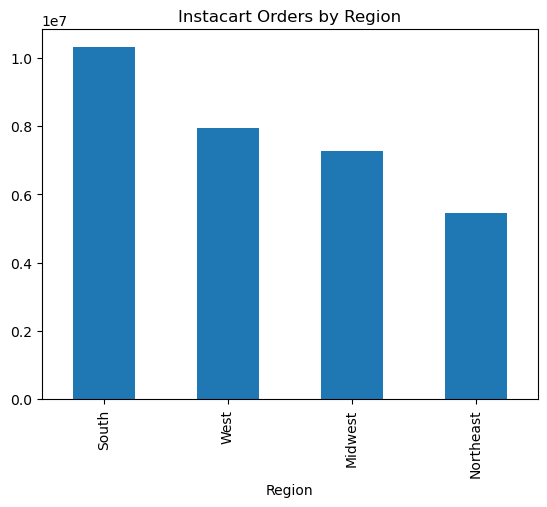

In [128]:
#Create bar chart of orders by region
bar = ords_prods_cust_active['Region'].value_counts().plot.bar()
plt.title('Instacart Orders by Region')

In [129]:
#Export bar chart to png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

In [130]:
#Compare loyalty_flag with price range
crosstab15 = pd.crosstab(ords_prods_cust_active['loyalty_flag'], [ords_prods_cust_active['price_range_loc']], dropna = True)

In [131]:
print(crosstab15)

price_range_loc   High-range product  Low-range product  Mid-range product
loyalty_flag                                                              
Loyal customer                119936            3214690            6949467
New customer                   65927            1501288            3236480
Regular customer              212090            4958862           10705824


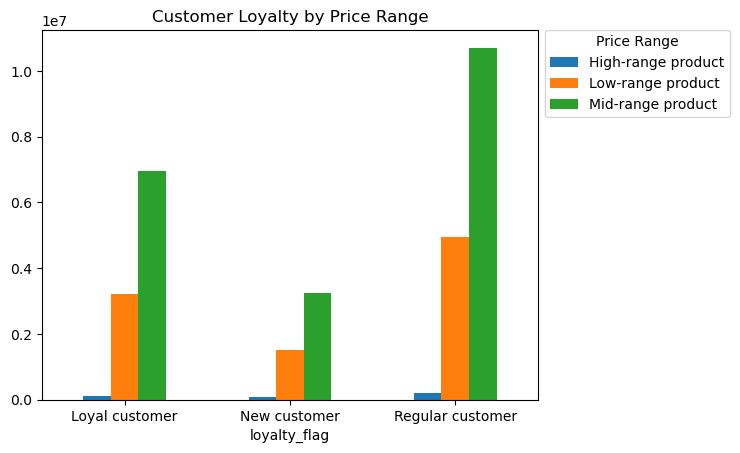

In [132]:
#Create bar chart of crosstab15
o = crosstab15.plot(kind = 'bar', rot = 0, title = 'Customer Loyalty by Price Range')
o.legend(title = 'Price Range', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [133]:
#Export bar chart to png
o.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_price_range.png'))

In [134]:
#Look at loyalty frequency
ords_prods_cust_active['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Loyalty to Instacart')

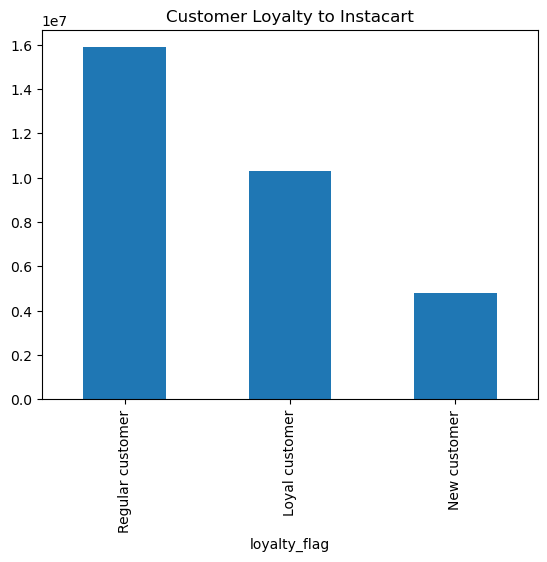

In [135]:
#Create bar chart of loyalty
bar = ords_prods_cust_active['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty to Instacart')

In [136]:
#Export bar chart to png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [137]:
#Look at days since prior order
ords_prods_cust_active['days_since_prior_order'].value_counts(dropna = False)

days_since_prior_order
7.0     3417439
30.0    2674369
6.0     2478763
5.0     2097483
4.0     2057523
8.0     1893814
3.0     1859814
NaN     1661283
2.0     1451368
9.0     1190720
14.0     991305
10.0     943601
1.0      931690
13.0     822986
11.0     797928
12.0     750735
15.0     645987
16.0     441608
0.0      438011
21.0     420431
17.0     365616
20.0     361307
18.0     336197
19.0     319029
22.0     292484
28.0     236454
23.0     212814
27.0     190387
24.0     182811
25.0     169829
26.0     167175
29.0     163603
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Days Since Prior Order')

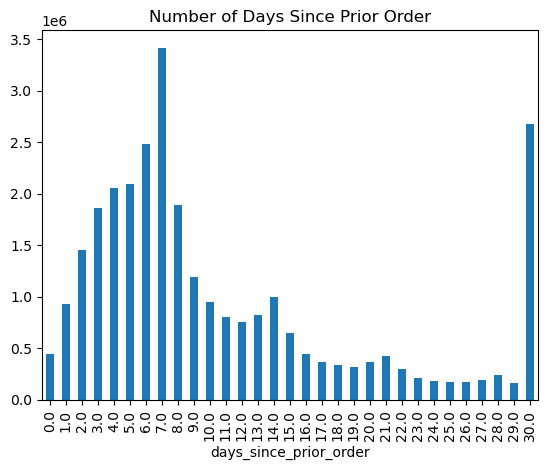

In [138]:
#Create bar of days since prior order
bar = ords_prods_cust_active['days_since_prior_order'].value_counts().sort_index().plot.bar()
plt.title('Number of Days Since Prior Order')

In [139]:
#Export bar chart to png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_days_since_prior_order.png'))

In [140]:
#Look at frequency of orders by department
ords_prods_cust_active['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Orders by Department')

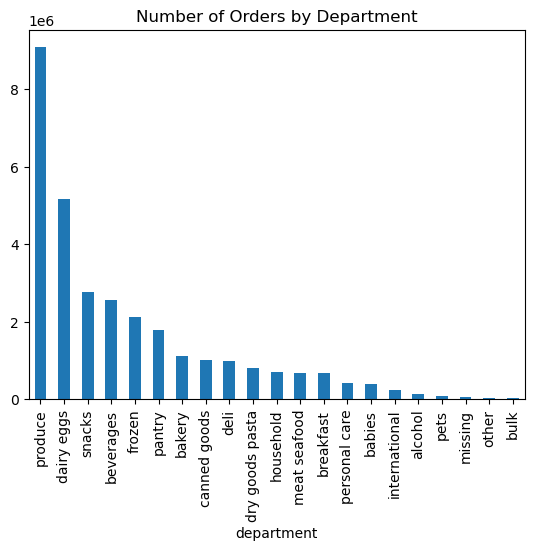

In [141]:
#Create bar chart of department frequencies
bar = ords_prods_cust_active['department'].value_counts().plot.bar()
plt.title('Number of Orders by Department')

In [142]:
#Export bar chart to png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_orders.png'))

In [143]:
#Export dataframe to close notebook
ords_prods_cust_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active.pkl'))